<a href="https://colab.research.google.com/github/bschmid36/Music_Recommendation_Systems/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - With the large amount of music content currently available to users on Spotify, it is important to help those users efficiently and accurately find content that is of interest to them. A platform like Spotify will not be able to reach it's full potential if users have to comb through millions and millions of songs and artists to find content they like. This is twofold, not only will users find this effort tedious and frustrating, but artists will also be more hesitant to upload their music to the platform because people will have trouble discovering and engaging with it.

 This makes it important to have a powerful recommendation system in place which creates long term engagement by users and artists alike. This will create more traffic and therefore revenue for the platform.

### **The objective:**

 - The intended goal of this endeavor is to build a recommendation system that recommends 10 songs to users based on their predicted likelihood of listening to and likeing said songs. 

### **The key questions:**

- What patterns and insights can be found in the data?
- Which recommendation system/algorithm can best recommend songs to new users?
- Which metric(s) should be used to best evaluate the performance of the models?
- What further work can be done to improve proposed model?

### **The problem formulation**:

- Given a user, what are the top 10 songs that should be recommended based on the likelihood of them listening to those songs?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from collections import defaultdict

from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Million Songs Dataset/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Million Songs Dataset/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Checking the data types and and missing values of each column**

In [ ]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
- There are 4 variables in the count_data. The unnamed column will be dropped. The user_id and song_id columns are objects while the play_count is numerical.
- There are 5 variables in the song_data which are all objects except for year. There are a very small amount of missing values for title and release.


In [ ]:
# Left merging the count_df and song_df data on "song_id". Dropping duplicates from song_df data simultaneously

# Dropping the column 'Unnamed: 0'

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [ ]:
# Applying label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id']) 

df['song_id'] = le.fit_transform(df["song_id"])
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
users = df.user_id

ratings_count = dict()

for user in users:
    # If already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# Want users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# List of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
songs = df.song_id

ratings_count = dict()

for song in songs:
    # If already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# Want song to be listened to by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final = df[df['play_count']<=5]

In [ ]:
df[df['play_count']>5].shape

(37660, 7)

In [ ]:
df_final.shape

(400730, 7)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400730 entries, 196 to 1999769
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      400730 non-null  int64 
 1   song_id      400730 non-null  int64 
 2   play_count   400730 non-null  int64 
 3   title        400730 non-null  object
 4   release      400730 non-null  object
 5   artist_name  400730 non-null  object
 6   year         400730 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 24.5+ MB


In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
196,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995
197,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008
198,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008
199,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000


## **Exploratory Data Analysis**

Total number of unique user id

In [ ]:
df_final['user_id'].nunique()

3156

Total number of unique song id

In [ ]:
df_final['song_id'].nunique()

9998

Total number of unique artists

In [ ]:
df_final['artist_name'].nunique()

3374

#### **Observations and Insights:**
- There are 3156 unique users, 9998 unique songs, and 3374 unique artists.
- Many possibilites to recommend new music to users


Most interacted songs

In [ ]:
df_final.title.value_counts()

Use Somebody                                                751
Dog Days Are Over (Radio Edit)                              748
Sehr kosmisch                                               713
Clocks                                                      662
The Scientist                                               652
                                                           ... 
Opened Once                                                   1
The Best Thing                                                1
So Confused (feat. Butta Creame) (amended album version)      1
La Prima Cosa Bella                                           1
Beloved                                                       1
Name: title, Length: 9566, dtype: int64

Most interacted users

In [ ]:
df_final.user_id.value_counts()

75144    621
32542    587
23297    531
10807    512
6480     496
        ... 
5162      21
41864     20
54801     18
31296     17
51269     13
Name: user_id, Length: 3156, dtype: int64

#### **Observations and Insights:**
- The most song with the most interactions has 751 observations
- User 75144 has 621 observations which is the most amount of interactions
- There are 3156 unique users and 9998 unique songs so a possibility of 3156*9998=31,553,688 interactions which is well above the ~400,000 observations in the data set


Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,27371
2007,39409
2008,38090
2009,34390
2010,13809


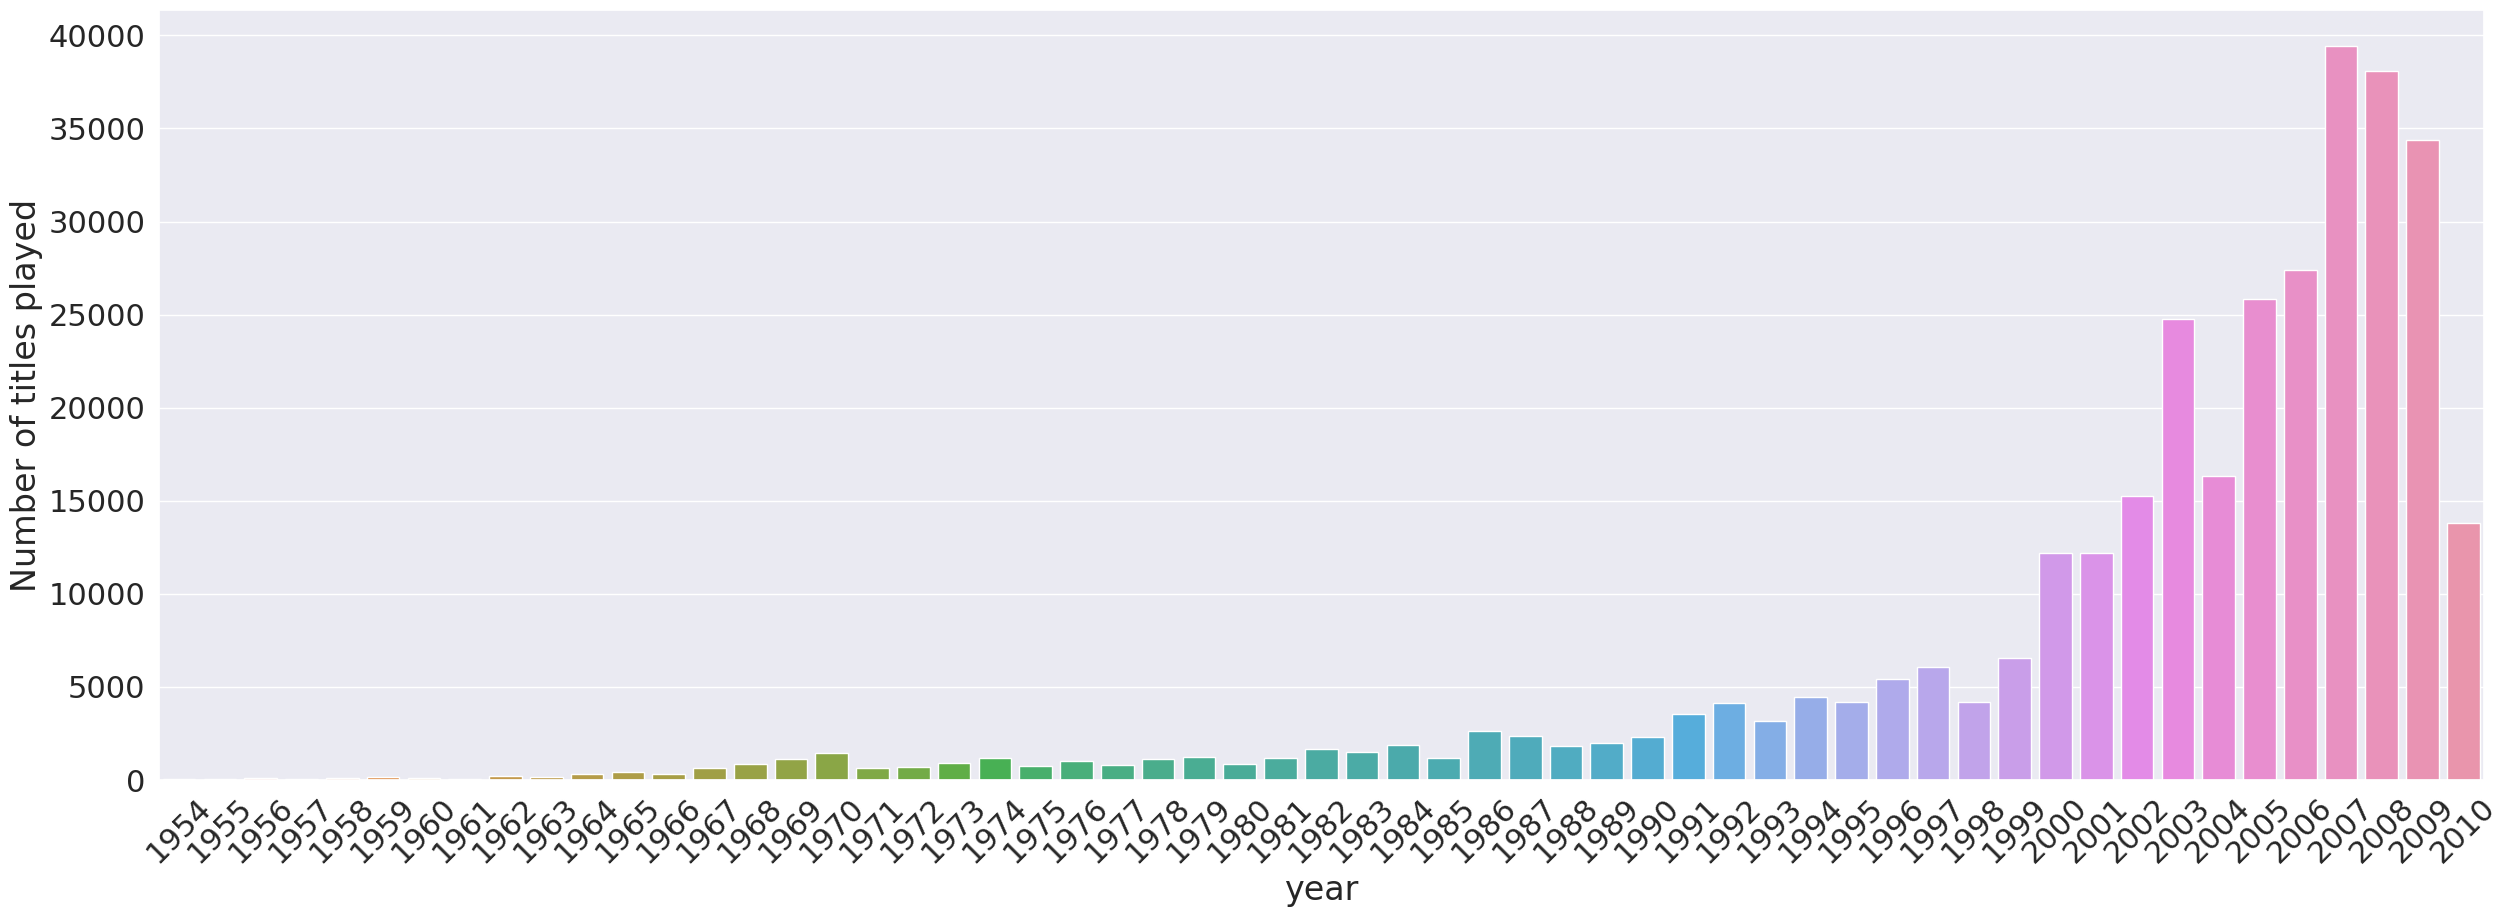

In [ ]:
plt.figure(figsize = (30, 10))
sns.set(font_scale=2)
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

plt.ylabel('Number of titles played') 
plt.xticks(rotation = 45)

plt.show()

#### **Observations and Insights:** # 

- The majority of songs played occur after the year 2000.  This makes sense as they are more current and popular.
- There are less songs available to recommend to the older portion of the demographic.

## **Important Insights from EDA**

- The final data set has over 400,000 observations
- There are no missing values after combining the two data sets and setting limits on the number of songs a user must listen to and the number of listens a song must have to be included in the final data set
- The most song with the most interactions has 751 observations
-User 75144 has 621 observations which is the most amount of interactions
-There are 3156 unique users and 9998 unique songs so a possibility of 3156*9998=31,553,688 interactions which is well above the ~400,000 observations in the data set
- The majority of songs played occur after the year 2000. This makes sense as they are more current and popular.
- There are less songs available to recommend to the older portion of the demographic.

## Building various models

### **Popularity-Based Recommendation Systems**

In [ ]:
# Calculating average play_count
average_count = df_final.groupby(['song_id']).mean()['play_count']        

# Calculating the frequency a song is played
play_freq = df_final.groupby(['song_id']).sum()['play_count']       

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

final_play.head()

,avg_count,play_freq
song_id,,
0,1.000000,11
1,1.673913,77
2,2.000000,14
3,2.416667,29
4,1.458333,70


In [ ]:
final_play['play_freq'].sort_values()

song_id
6812       1
3298       1
9616       1
9313       1
7          1
        ... 
4448    1291
5531    1427
8582    1463
2220    1583
352     1634
Name: play_freq, Length: 9998, dtype: int64

In [ ]:
# Function to find top n songs

def top_n_songs(final_play, n, min_interaction):
    
    recommendations = final_play[final_play['play_freq']>min_interaction]
    
    recommendations = recommendations.sort_values(by='avg_count',ascending=False)
    
    return recommendations.head(n)

In [ ]:
top_n_songs(final_play,10,50)

,avg_count,play_freq
song_id,,
1226,3.400000,51
7224,3.373832,361
3749,3.368421,64
5310,3.187500,51
4049,2.947368,56
8267,2.900000,58
307,2.884615,75
5269,2.869565,66
7632,2.869565,66


### **User User Similarity-Based Collaborative Filtering**

In [ ]:
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193691 sha256=dc73fc5f741646f67f84a58800e5df709ab5af02e49d1126965608d1291393f8
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
from surprise import accuracy

from surprise.reader import Reader

from surprise.dataset import Dataset

from surprise.model_selection import GridSearchCV

from surprise.model_selection import train_test_split

from surprise.prediction_algorithms.knns import KNNBasic

from surprise.prediction_algorithms.matrix_factorization import SVD

from surprise.model_selection import KFold

from surprise import CoClustering

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [ ]:
# Function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # Map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    print('Precision: ', precision)

    print('Recall: ', recall)
    
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

In [ ]:
# Default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

sim_user_user = KNNBasic(sim_options=sim_options,random_state=1,verbose=False) # Use random_state = 1 

sim_user_user.fit(trainset)

# Computing precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0964
Precision:  0.388
Recall:  0.597
F_1 score:  0.47


**Observations and Insights:**
*   The baseline model is giving an initial RMSE of ~1, meaning the mean error is off by 1 on a rating scale which only has a range of 1-5. This is a large error in this case.
*   The recall is ~0.6 which implies that ~60% of relevant products are recommended.
*  The precision is ~0.39 which implies that ~39% of the recommended products are relevant.
* The F_1 score is ~0.47 

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Using user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.35   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3504140661962374, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Using user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.35   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3459591866913703, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Parameter grid to tune the hyperparameters

param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



'\nparam_grid = {\'k\': [10, 20, 30], \'min_k\': [3, 6, 9],\n              \'sim_options\': {\'name\': ["cosine", \'pearson\', "pearson_baseline"],\n                              \'user_based\': [True], "min_support": [2, 4]}\n              }\n\n# Performing 3-fold cross-validation to tune the hyperparameters\ngs = GridSearchCV(KNNBasic, param_grid, measures = [\'rmse\'], cv = 3, n_jobs = -1)\n# Fitting the data\ngs.fit(data) # Use entire data for GridSearch\n\n# Best RMSE score\nprint(gs.best_score[\'rmse\'])\n# Combination of parameters that gave the best RMSE score\nprint(gs.best_params[\'rmse\'])\n\n'

In [ ]:
# Training the best model found in above gridsearch
sim_options = {'name': 'pearson_baseline',
               'user_based': True, 'min_support': 2}


sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

sim_user_user_optimized.fit(trainset)


precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0581
Precision:  0.398
Recall:  0.684
F_1 score:  0.503


**Observations and Insights:**
- The RMSE has not improved much
- The precision has remained steady but the recall has increased from 0.597 to 0.684.

In [ ]:
# Predict the play count for a user who has listened to the song. Use user_id 6958, song_id 1671
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.15   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.1458306071458928, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
df1=df_final[df_final['user_id']==6958]
df1[df1['song_id']==1671]

,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [ ]:
# Predict the play count for a song that is not listened to by the user (user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.86   {'actual_k': 12, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.8607083703797433, details={'actual_k': 12, 'was_impossible': False})

In [ ]:
# Nearest neighbors for id 0
sim_user_user_optimized.get_neighbors(0, 5)

[724, 434, 439, 462, 2636]

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    recommendations = []
    
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    for item_id in non_interacted_products:
        
        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est
        
        recommendations.append((item_id, est))

    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations =get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,498,3.253887
1,3271,2.990336
2,8462,2.901514
3,6478,2.742740
4,5167,2.621877


### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)
  return ranked_songs

In [ ]:
ranking_songs(recommendations,final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,498,264,3.253887,3.192341
2,3271,199,2.990336,2.919448
3,8462,133,2.901514,2.814803
1,6478,229,2.742740,2.676658
4,5167,93,2.621877,2.518182


### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
sim_options = {'name': 'cosine',
               'user_based': False}

sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

sim_item_item.fit(trainset)

precision_recall_at_k(sim_item_item)

RMSE: 1.0377
Precision:  0.366
Recall:  0.477
F_1 score:  0.414


**Observations and Insights:**
*   The baseline model is giving an initial RMSE of ~1, meaning the mean error is off by 1 on a rating scale which only has a range of 1-5. This is a large error in this case.
*   The recall is ~0.48 which implies that ~48% of relevant products are recommended.
*  The precision is ~0.37 which implies that ~37% of the recommended products are relevant.
* The F_1 score is ~0.41 
* This baseline model is performing worse than the user-user model

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.20   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.1962692660135892, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
df2=df_final[df_final['user_id']==1452]
df2[df2['song_id']==1671]

,user_id,song_id,play_count,title,release,artist_name,year


In [ ]:
# Predicting the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(1452, 1671, verbose = True)

user: 1452       item: 1671       r_ui = None   est = 1.69   {'actual_k': 33, 'was_impossible': False}


Prediction(uid=1452, iid=1671, r_ui=None, est=1.6905532004950006, details={'actual_k': 33, 'was_impossible': False})

In [ ]:

param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3)

gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

In [ ]:
# Applying the best model found in the grid search
sim_options = {'name': 'pearson_baseline',
               'user_based': False, 'min_support': 2}


sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

sim_item_item_optimized.fit(trainset)


precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0290
Precision:  0.411
Recall:  0.629
F_1 score:  0.497


**Observations and Insights:**
*   The optimized model is giving an initial RMSE of ~1, meaning the mean error is off by 1 on a rating scale which only has a range of 1-5. This is a large error in this case.
*   The recall is ~0.63 which implies that ~63% of relevant products are recommended.
*  The precision is ~0.41 which implies that ~41% of the recommended products are relevant.
* The F_1 score is ~0.50
* This model is performing better than the baseline.
* Precision is the main focus and this model has the highest so far

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.00   {'actual_k': 19, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.0, details={'actual_k': 19, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, r_ui = 2, verbose = True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.00   {'actual_k': 14, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.0, details={'actual_k': 14, 'was_impossible': False})

In [ ]:
# Five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[2295, 265, 3014, 129, 3444]

In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,4619,2.744019
1,3465,2.609532
2,3578,2.605501
3,7682,2.513016
4,1669,2.454184


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations,final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,4619,52,2.744019,2.605344
1,3578,127,2.605501,2.516765
2,3465,110,2.609532,2.514186
0,7682,238,2.513016,2.448196
3,1669,89,2.454184,2.348184


### Model Based Collaborative Filtering - Matrix Factorization

In [ ]:
svd = SVD(random_state=1)

svd.fit(trainset)

precision_recall_at_k(svd)

RMSE: 1.0338
Precision:  0.402
Recall:  0.533
F_1 score:  0.458


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671)
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.07   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.0669740372755294, details={'was_impossible': False})

In [ ]:
df3=df_final[df_final['user_id']==1452]
df3[df3['song_id']==3232]

,user_id,song_id,play_count,title,release,artist_name,year


In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.17   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1677440109258768, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3)

gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])


1.0192843124128623
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2}


In [ ]:
svd_optimized = SVD(n_epochs=10, lr_all=0.005, reg_all=0.2, random_state=1)

svd_optimized.fit(trainset)

precision_recall_at_k(svd_optimized)

RMSE: 1.0224
Precision:  0.405
Recall:  0.55
F_1 score:  0.466


**Observations and Insights:**
*   The optimized model is giving an initial RMSE of ~1, meaning the mean error is off by 1 on a rating scale which only has a range of 1-5. This is a large error in this case.
*   The recall is ~0.55 which implies that ~55% of relevant products are recommended.
*  The precision is ~0.41 which implies that ~41% of the recommended products are relevant.
* The F_1 score is ~0.47
* The precision is very close to the optimized item-item model

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.22   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.218181976779715, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3149218211560014, details={'was_impossible': False})

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.627384
1,8324,2.258954
2,6574,2.212654
3,9050,2.178473
4,5797,2.177542


In [ ]:
# Ranking songs based on above recommendations
ranking_songs(recommendations,final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,7224,361,2.627384,2.574752
1,8324,252,2.258954,2.195960
3,6574,62,2.212654,2.085653
2,5797,113,2.177542,2.083470
4,9050,42,2.178473,2.024169


### Cluster Based Recommendation System

In [ ]:
clust_baseline = CoClustering(random_state = 1)

clust_baseline.fit(trainset)

precision_recall_at_k(clust_baseline,10,1.5)

RMSE: 1.0629
Precision:  0.418
Recall:  0.25
F_1 score:  0.313


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.68   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.679651984993263, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.40   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3984654182759, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs=-1)


gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])


1.0807928059973142
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


In [ ]:
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

clust_tuned.fit(trainset)

precision_recall_at_k(clust_tuned)

RMSE: 1.0845
Precision:  0.4
Recall:  0.507
F_1 score:  0.447


**Observations and Insights:**
*   The optimized model is giving an initial RMSE of ~1.1, meaning the mean error is off by 1.1 on a rating scale which only has a range of 1-5. This is a large error in this case.
*   The recall is ~0.51 which implies that ~51% of relevant products are recommended.
*  The precision is ~0.4 which implies that ~40% of the recommended products are relevant.
* The F_1 score is ~0.45 

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2 , verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.69   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.6944011192412509, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 2.08   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=2.0833419636042256, details={'was_impossible': False})

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.627384
1,8324,2.258954
2,6574,2.212654
3,9050,2.178473
4,5797,2.177542


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations,final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,4840,14,5.000000,4.732739
1,8061,14,4.564702,4.297441
2,6705,13,4.564702,4.287352
3,150,8,4.521698,4.168145
4,5989,5,4.521698,4.074485


### Content Based Recommendation Systems

In [ ]:
df_small = df_final

In [ ]:
# Concatenating the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
196,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995,Aunt Eggma Blowtorch Everything Is Neutral Mil...
197,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008,Full Circle Breakout Miley Cyrus
198,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008,Poor Jackie Rabbit Habits Man Man
199,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008,Hot N Cold (Manhattan Clique Remix Radio Edit)...
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown


In [ ]:
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
df_small = df_small.drop_duplicates(subset = ['title'])
df_small = df_small.set_index('title')
df_small.head()



,user_id,song_id,play_count,text
title,,,,
Aunt Eggma Blowtorch,6958,12,1,Aunt Eggma Blowtorch Everything Is Neutral Mil...
Full Circle,6958,40,1,Full Circle Breakout Miley Cyrus
Poor Jackie,6958,151,2,Poor Jackie Rabbit Habits Man Man
Hot N Cold (Manhattan Clique Remix Radio Edit),6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit)...
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown


In [ ]:
# Creating series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                              Aunt Eggma Blowtorch
1                                       Full Circle
2                                       Poor Jackie
3    Hot N Cold (Manhattan Clique Remix Radio Edit)
4                                Daisy And Prudence
Name: title, dtype: object

In [ ]:
import nltk

nltk.download("punkt")

nltk.download("stopwords")

nltk.download("wordnet")

import re

from nltk import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
#tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

music_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()



In [ ]:
pd.DataFrame(music_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,11264,11265,11266,11267,11268,11269,11270,11271,11272,11273
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similar_songs = cosine_similarity(music_tfidf, music_tfidf)

similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    idx = indices[indices == title].index[0]

    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[1956, 5606, 1939, 4528, 3507, 3453, 1954, 1918, 5138, 1934]


['Generator',
 'Stacked Actors',
 'Big Me',
 'For All The Cows',
 'Floaty',
 'Exhausted',
 'Wattershed',
 'Oh_ George',
 'X-Static',
 "I'll Stick Around"]

**Observations and Insights:**
- All of the recommend songs come from the same artist and most come from the same album as well
- This method is not very affective given that there is not much variety
- This makes sense however since the text used was centered around album name and artist name.

## **Conclusion and Recommendations**


- RMSE and precision were the chosen metrics to compare models
-precision was chosen over recall because in this situation it is more important that the songs recommended to a user are actually relevant rather than every relevant song be recommended
-The tuned matrix factorization based model performs the best since it has the second highest precision by a close margin and also the lowest RMSE but it is not the most interpretable model. 
-The item-item similarity based model has the same precision and only a slightly higher RMSE in addition to better interpretability because the latent features of matrix factorization cannot be interpreted. 
- Since a lot of data was removed due to computation limits, it is recommended to include the rest of the data in the future so information is not lost
- Other more complex models and hybrid models should also be tested in the future that are out of the scope of this project
- Lastly, because the gridsearch function takes so long, only a few parameters were tested here, but it would be worth testing additional hyperparameter values to further improve models
